# **<font color='orange'>Biking Through Data</font>**

# **<font color='orange'>A Predictive Analysis of Rental Trends</font>**

##### **Project Type - Regression**

## Summary

This project involves building a machine learning model to predict the demand for bike rentals in Seoul, South Korea. The goal is to ensure the availability of rental bikes at the right times by forecasting hourly demand, using various features like weather, temperature, wind speed, and more.

## **Problem Statement**

The business challenge is to ensure a steady supply of rental bikes in urban areas by accurately predicting the demand for bikes on an hourly basis. A stable bike supply enhances public mobility, reduces wait times, and leads to greater customer satisfaction.

To solve this problem, we will develop a predictive model that accounts for key factors influencing demand, such as time of day, seasonality, weather conditions, and holidays. Accurate demand predictions will enable bike-sharing operators to maintain an adequate supply of bikes, improving user experience and increasing system usage. This can positively impact urban sustainability by reducing traffic congestion, air pollution, and greenhouse gas emissions.

In [25]:
import sys                             # Read system parameters
import os                              # Interact with the operating system
import numpy as np                     # Work with multi-dimensional arrays and matrices
import pandas as pd                    # Manipulate and analyze data
import matplotlib                      # Create 2D charts
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp                     # Perform scientific computing and advanced mathematics
import sklearn                         # Perform data mining and analysis
import seaborn as sb                   # Perform data visualization

    # Summarize software libraries used
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Scikit-learn {}'.format(sklearn.__version__))
print('- Python {}\n'.format(sys.version))

Libraries used in this project:
- NumPy 1.26.4
- Pandas 2.2.3
- Matplotlib 3.8.0
- SciPy 1.11.4
- Scikit-learn 1.2.2
- Python 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]



# 1. Data Exploration

•	First, I load the **Seoul Bike Sharing Demand Dataset** to get an initial look at the data structure. I use **Pandas** to load the **CSV file**, then check the first few rows using the **head()** method to familiarize myself with the dataset.

## Load the dataset

In [26]:
    # Load the dataset as a pandas DataFrame

file_path = 'C:/Users/Lenovo/seoul_bike_data.csv'
bike_data = pd.read_csv(file_path)

print(bike_data.head())

   bikes_rented  temp  humidity  wind_speed  visibility  dew_temp  solar_rad  \
0           254  -5.2        37         2.2        2000     -17.6        0.0   
1           204  -5.5        38         0.8        2000     -17.6        0.0   
2           173  -6.0        39         1.0        2000     -17.7        0.0   
3           107  -6.2        40         0.9        2000     -17.6        0.0   
4            78  -6.0        36         2.3        2000     -18.6        0.0   

   rainfall  snowfall  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0  


# Get acquainted with the dataset

## View data types and see if there are missing entries.

•	I inspect the data types of each column using dtypes to confirm whether they are correctly set (e.g., int64 for integers and float64 for decimals).

In [27]:
    # View data types of the DataFrame

data_types = bike_data.dtypes
print("Data Types:\n", data_types)

Data Types:
 bikes_rented      int64
temp            float64
humidity          int64
wind_speed      float64
visibility        int64
dew_temp        float64
solar_rad       float64
rainfall        float64
snowfall        float64
dtype: object


•	I also check for any missing values using isnull().sum() to ensure that the dataset is clean. Luckily, no missing values are found, so no imputation is needed.

In [28]:
    # Check for missing entries

missing_entries = bike_data.isnull().sum()
print("\nMissing Entries:\n", missing_entries)


Missing Entries:
 bikes_rented    0
temp            0
humidity        0
wind_speed      0
visibility      0
dew_temp        0
solar_rad       0
rainfall        0
snowfall        0
dtype: int64


In [29]:
     # Get acquainted with the dataset

dataset_info = bike_data.info()
print("\nDataset Information:\n", dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bikes_rented  8394 non-null   int64  
 1   temp          8394 non-null   float64
 2   humidity      8394 non-null   int64  
 3   wind_speed    8394 non-null   float64
 4   visibility    8394 non-null   int64  
 5   dew_temp      8394 non-null   float64
 6   solar_rad     8394 non-null   float64
 7   rainfall      8394 non-null   float64
 8   snowfall      8394 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 590.3 KB

Dataset Information:
 None


In [30]:
    # Display the shape of the DataFrame

print("\nDataset Dimensions (Rows, Columns):", bike_data.shape)


Dataset Dimensions (Rows, Columns): (8394, 9)


# Show example records

In [31]:
    # View first 10 records.

print(bike_data.head(10))

   bikes_rented  temp  humidity  wind_speed  visibility  dew_temp  solar_rad  \
0           254  -5.2        37         2.2        2000     -17.6       0.00   
1           204  -5.5        38         0.8        2000     -17.6       0.00   
2           173  -6.0        39         1.0        2000     -17.7       0.00   
3           107  -6.2        40         0.9        2000     -17.6       0.00   
4            78  -6.0        36         2.3        2000     -18.6       0.00   
5           100  -6.4        37         1.5        2000     -18.7       0.00   
6           181  -6.6        35         1.3        2000     -19.5       0.00   
7           460  -7.4        38         0.9        2000     -19.3       0.00   
8           930  -7.6        37         1.1        2000     -19.8       0.01   
9           490  -6.5        27         0.5        1928     -22.4       0.23   

   rainfall  snowfall  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  

# Examine a general summary of statistics

•	Next, I explore the basic statistics of the data using describe(), which gives me a summary of the count, mean, minimum, and maximum values for each feature. This helps me understand the range and distribution of variables like temperature, wind speed, and the number of bikes rented.

In [32]:
    # Examine a general summary of statistics

summary_statistics = bike_data.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
        bikes_rented         temp     humidity   wind_speed   visibility  \
count   8394.000000  8394.000000  8394.000000  8394.000000  8394.000000   
mean     731.374792    12.812009    58.074696     1.740481  1433.226590   
std      643.616638    12.108977    20.483539     1.026341   609.803729   
min        2.000000   -17.800000     0.000000     0.100000    27.000000   
25%      214.000000     3.100000    42.000000     1.000000   932.250000   
50%      546.000000    13.600000    57.000000     1.500000  1690.000000   
75%     1088.000000    22.700000    74.000000     2.300000  2000.000000   
max     3556.000000    39.400000    98.000000     7.400000  2000.000000   

          dew_temp    solar_rad     rainfall     snowfall  
count  8394.000000  8394.000000  8394.000000  8394.000000  
mean      3.964260     0.572427     0.149261     0.077949  
std      13.242399     0.870429     1.126075     0.445800  
min     -30.600000     0.000000     0.000000     0.000000  
25

# Look for columns that correlate with `bikes_rented`

In [33]:
    # Look for columns that correlate with bikes_rented

correlation_matrix = bike_data.corr()
correlation_with_bikes_rented = correlation_matrix['bikes_rented'].sort_values(ascending=False)

print("\nCorrelations with bikes_rented:\n", correlation_with_bikes_rented)


Correlations with bikes_rented:
 bikes_rented    1.000000
temp            0.563440
dew_temp        0.401160
solar_rad       0.272748
visibility      0.213989
wind_speed      0.120961
rainfall       -0.128794
snowfall       -0.151881
humidity       -0.201466
Name: bikes_rented, dtype: float64


# Visually analyze cross correlations

# Use Seaborn to plot the correlation matrix as a heatmap.

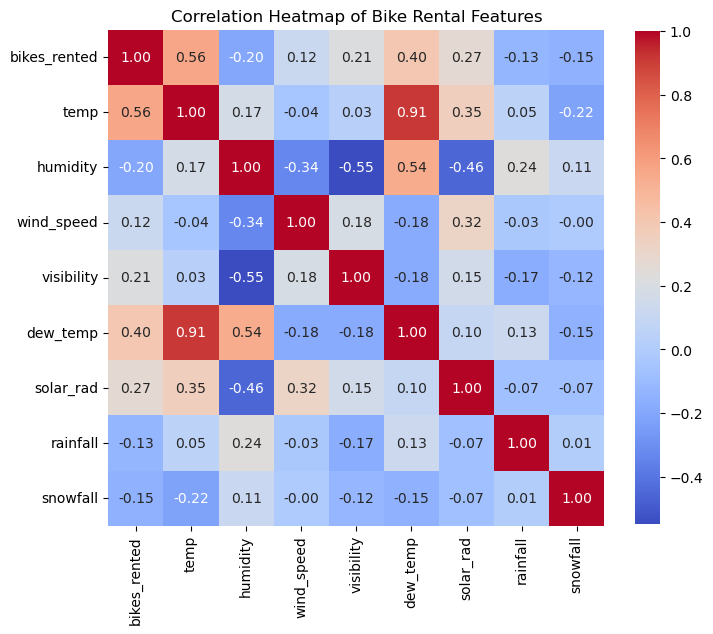

In [34]:
    # Set up the matplotlib figure

plt.figure(figsize=(8, 8))

    # Draw the heatmap with the mask and correct aspect ratio

sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

    # Set title

plt.title('Correlation Heatmap of Bike Rental Features')
plt.show()

# 2. Data Preprocessing

## Use histograms to visualize the distribution of all features

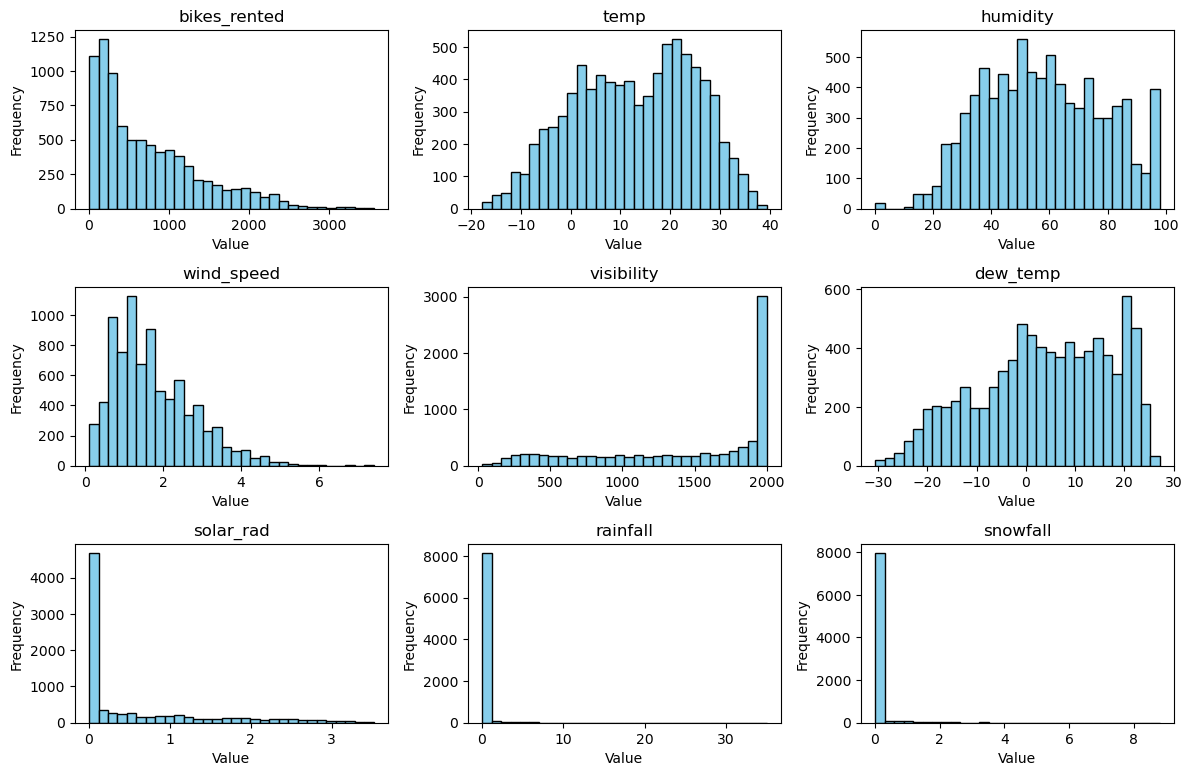

In [35]:
# Set up the matplotlib figure for histograms
plt.figure(figsize=(12, 10))

# Loop through each feature and create a histogram
for i, column in enumerate(bike_data.columns):
    plt.subplot(len(bike_data.columns) // 3 + 1, 3, i + 1)  # Adjust number of rows/columns as needed
    plt.hist(bike_data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Split the data into training and testing sets and labels

•	I split the data into training and testing sets using train_test_split() from sklearn. This allows me to train my model on 80% of the data and evaluate it on the remaining 20%.

•	And define the features (independent variables) by removing the bikes_rented column from the dataset using drop(). These features include weather conditions like temperature, wind speed, humidity, visibility, and others.

In [36]:
# Split the training and test datasets and their labels.Compare the number of rows and columns in the original data to the training and test sets. 

from sklearn.model_selection import train_test_split

    # Define the features and labels
X = bike_data.drop('bikes_rented', axis=1)  # Features (independent variables)
y = bike_data['bikes_rented']  # Labels (dependent variable)

    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (6715, 8)
Testing set shape: (1679, 8)
Training labels shape: (6715,)
Testing labels shape: (1679,)


•	The target variable **(bikes_rented)** is **isolated** as the dependent variable.

•	Also I make sure the **shapes** of the training and test sets **are correct** before proceeding.

# 3. Initial Model Building

## Build and test an initial linear regression model

•	I start by creating a simple linear regression model using **LinearRegression()** from sklearn.

•	Then fit the model on the training data using **fit()** and after that make predictions on the test set with **predict()**.

In [37]:
    # Create a linear regression model. Fit the model using training data and labels.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

    # Initialize the linear regression model
model = LinearRegression()

    # Fit the model to the training data
model.fit(X_train, y_train)

    # Make predictions on the test set
y_pred = model.predict(X_test)

    # Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 225374.41599613332
R-squared (R2): 0.4435625734237313


•	To **evaluate** the model, I calculate the **Mean Squared Error (MSE)** and the **R-squared (R²)** values using **mean_squared_error()** and **r2_score()**. The **R² score** initially is about **0.44**, indicating that the model explains around **44%** of the variance in bike rentals.

# Use the holdout dataset to test the model

In [38]:
# Print the regressor model's score using the test data and labels.

# Generate a score for the initial linear regression model using the test set
model_score = model.score(X_test, y_test)

# Print the model's score
print("Model Score (R²):", model_score)

Model Score (R²): 0.4435625734237313


# Compare the first ten predictions to actual values

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
    })
# Display the first ten comparisons
print(comparison_df.head(10))

      Actual    Predicted
33       328    82.528285
3898    1058  1156.071911
766      273   517.007936
8071    1037   813.263484
4746    2378  1079.153589
5422     695   844.249676
1426     170   123.496310
1328     322   -59.803804
1076     321   444.626422
5209     670   843.559925


# 4. Identifying and Handling Outliers

•	I create box plots for bikes_rented and wind_speed to visually inspect for outliers. This is done using Seaborn’s boxplot() function. I discover that some instances of bikes_rented are above 3500, which are clear outliers. Similarly, wind_speed has values above 6 meters per second that also appear as outliers.

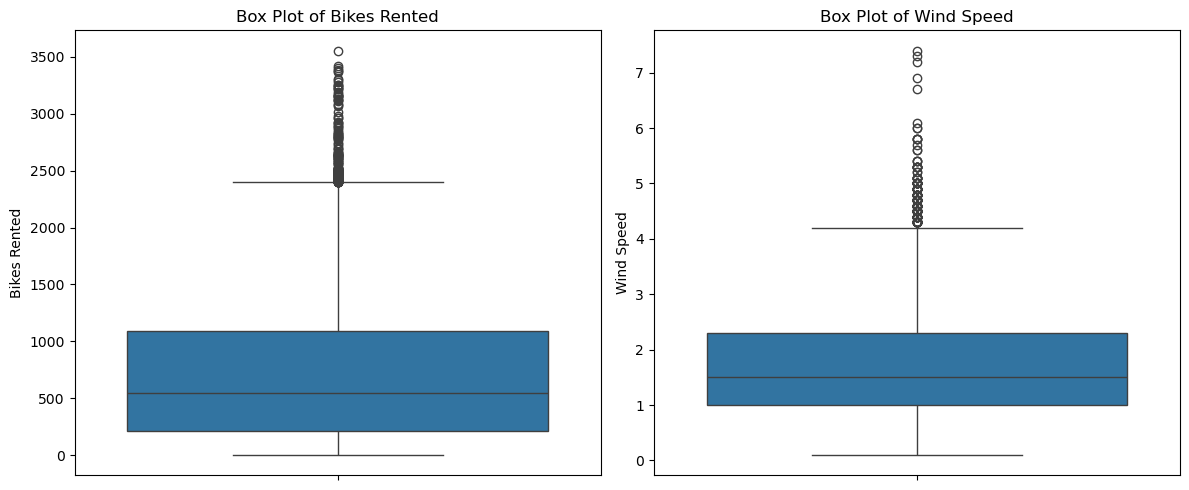

In [40]:
# Use Matplotlib to create box plot distributions for bikes rented and wind speed.

# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# Create a box plot for bikes_rented
plt.subplot(1, 2, 1)
sb.boxplot(y=bike_data['bikes_rented'])
plt.title('Box Plot of Bikes Rented')
plt.ylabel('Bikes Rented')

# Create a box plot for wind_speed
plt.subplot(1, 2, 2)
sb.boxplot(y=bike_data['wind_speed'])
plt.title('Box Plot of Wind Speed')
plt.ylabel('Wind Speed')

# Adjust layout
plt.tight_layout()
plt.show()

# Examine data values in the outliers

In [41]:
# Show rows that exceed 3,500 bikes rented.
outliers_bikes_rented = bike_data[bike_data['bikes_rented'] > 3500]

# Display the outliers
print("Outliers for Bikes Rented (over 3500):")
print(outliers_bikes_rented)

Outliers for Bikes Rented (over 3500):
      bikes_rented  temp  humidity  wind_speed  visibility  dew_temp  \
4743          3556  24.1        57         2.9        1301      15.0   

      solar_rad  rainfall  snowfall  
4743       0.56       0.0       0.0  


In [42]:
# Show rows with wind speed greater than 6 meters per second.
outliers_wind_speed = bike_data[bike_data['wind_speed'] > 6]

# Display the outliers
print("\nOutliers for Wind Speed (over 6 m/s):")
print(outliers_wind_speed)



Outliers for Wind Speed (over 6 m/s):
      bikes_rented  temp  humidity  wind_speed  visibility  dew_temp  \
909            146   0.7        77         6.7         692      -2.8   
3108           913  21.2        35         7.4        1992       5.1   
3112          1805  19.7        52         7.2        2000       9.5   
3114           336  19.1        58         6.1        2000      10.6   
3115           133  17.5        70         7.3        1634      11.9   
6230            49  25.3        70         6.9         925      19.4   

      solar_rad  rainfall  snowfall  
909         0.0       0.9       1.0  
3108        1.8       0.0       0.0  
3112        0.2       0.0       0.0  
3114        0.0       0.0       0.0  
3115        0.0       0.5       0.0  
6230        0.0       0.4       0.0  


# Drop outliers from the training dataset

•	To clean the data, I remove rows where bikes_rented is greater than 3500 and wind_speed exceeds 6. This step helps improve the model's performance by excluding extreme data points that could skew predictions.

In [43]:
# Define the thresholds for outliers
bikes_rented_threshold = 3500
wind_speed_threshold = 6

# Keep only the rows in the training set where bikes rented < 3500 and wind speed < 6
X_train_clean = X_train[(y_train < bikes_rented_threshold) & (X_train['wind_speed'] < wind_speed_threshold)]
y_train_clean = y_train[X_train.index.isin(X_train_clean.index)]

# Keep only the rows in the test set where bikes rented < 3500 and wind speed < 6
X_test_clean = X_test[(y_test < bikes_rented_threshold) & (X_test['wind_speed'] < wind_speed_threshold)]
y_test_clean = y_test[X_test.index.isin(X_test_clean.index)]

# Print the shapes of the cleaned datasets
print("Cleaned Training set shape:", X_train_clean.shape)
print("Cleaned Testing set shape:", X_test_clean.shape)
print("Cleaned Training labels shape:", y_train_clean.shape)
print("Cleaned Testing labels shape:", y_test_clean.shape)

Cleaned Training set shape: (6706, 8)
Cleaned Testing set shape: (1679, 8)
Cleaned Training labels shape: (6706,)
Cleaned Testing labels shape: (1679,)


# Compare the scale and distribution of `bikes_rented` and `wind_speed`

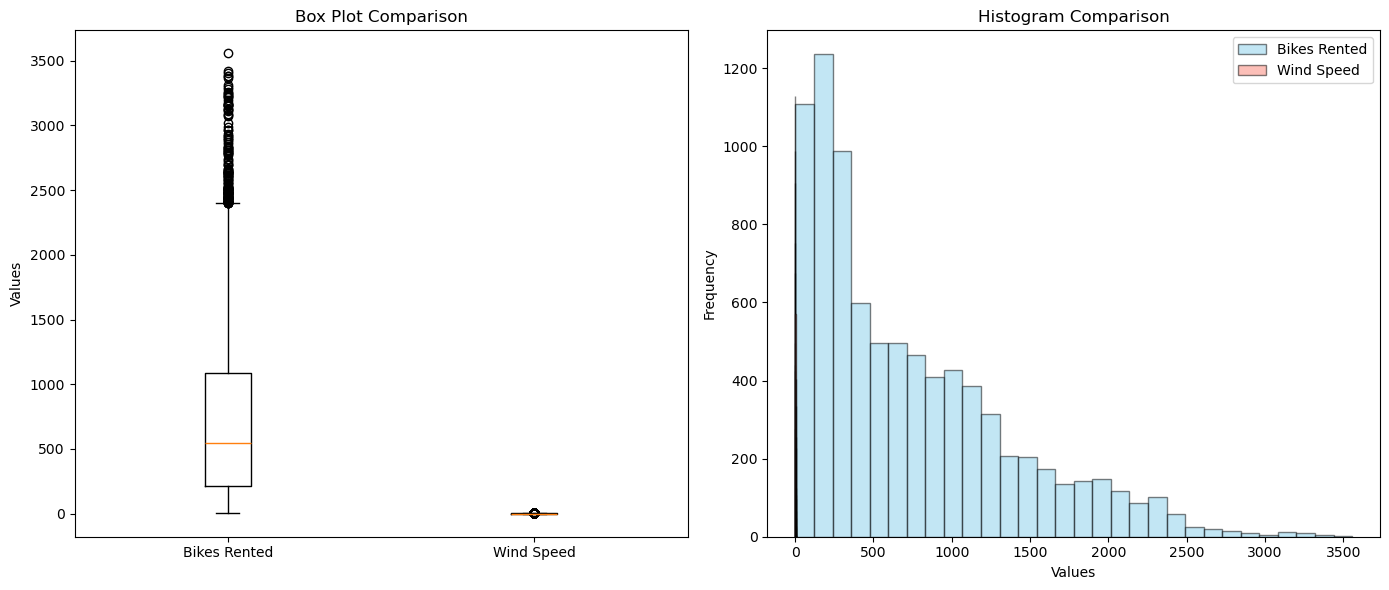

In [44]:
# Define a function that uses Matplotlib to visually compare the scale and distribution of bikes rented and wind speed.   
# Call the function. 

def compare_distribution(data1, data2, label1, label2):
    plt.figure(figsize=(14, 6))

    # Box plots
    plt.subplot(1, 2, 1)
    plt.boxplot([data1, data2], labels=[label1, label2])
    plt.title('Box Plot Comparison')
    plt.ylabel('Values')

    # Histograms
    plt.subplot(1, 2, 2)
    plt.hist(data1, bins=30, alpha=0.5, label=label1, color='skyblue', edgecolor='black')
    plt.hist(data2, bins=30, alpha=0.5, label=label2, color='salmon', edgecolor='black')
    plt.title('Histogram Comparison')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function to compare bikes_rented and wind_speed
compare_distribution(bike_data['bikes_rented'], bike_data['wind_speed'], 'Bikes Rented', 'Wind Speed')

# 5. Feature Engineering and Transformation

•	To handle the skewness of bikes_rented and wind_speed, I apply a log transformation using np.log(). This transformation helps normalize the data and reduce the impact of extreme values.

•	And then compare the distributions of the original and transformed features using histograms and box plots. This visual comparison helps me verify that the log transformation has improved the normality of the data.

## Transform `bikes_rented` and `wind_speed`, and compare results

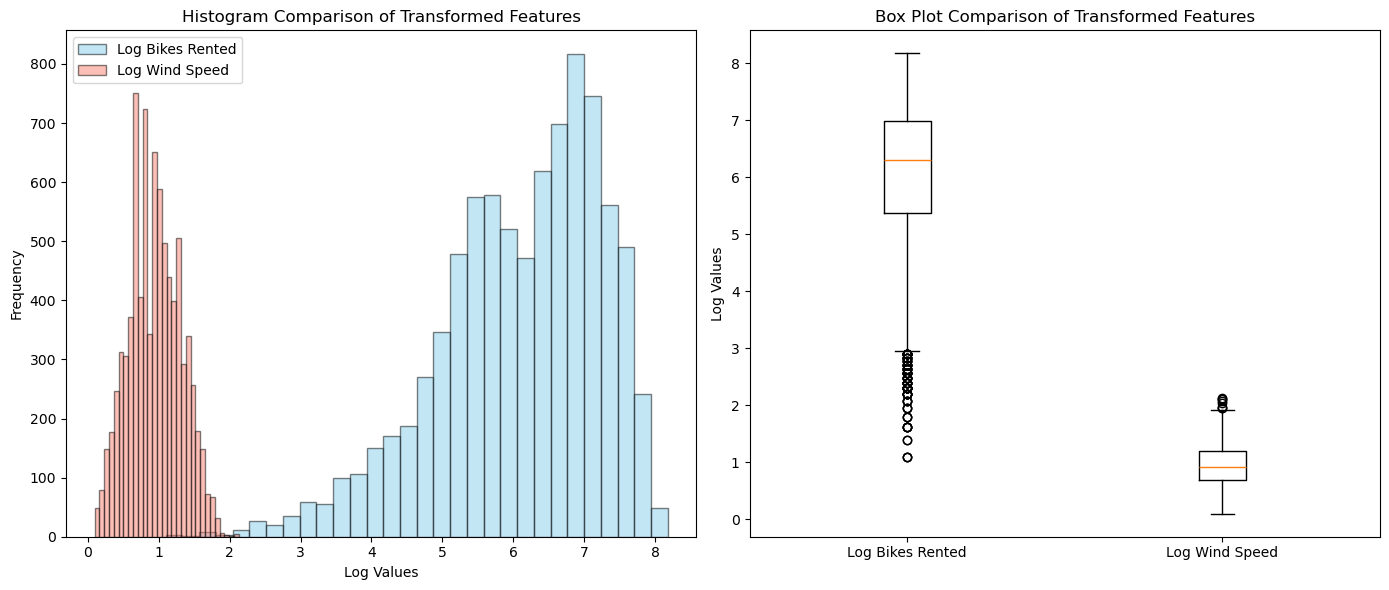

In [45]:
# Apply a log transformation (np.log) to scale bikes rented and wind speed.

# Apply a log transformation
bike_data['log_bikes_rented'] = np.log(bike_data['bikes_rented'] + 1)  # Adding 1 to avoid log(0)
bike_data['log_wind_speed'] = np.log(bike_data['wind_speed'] + 1)  # Adding 1 to avoid log(0)

# Function to compare distributions
def compare_transformed_distribution(data1, data2, label1, label2):
    plt.figure(figsize=(14, 6))

    # Histograms
    plt.subplot(1, 2, 1)
    plt.hist(data1, bins=30, alpha=0.5, label=label1, color='skyblue', edgecolor='black')
    plt.hist(data2, bins=30, alpha=0.5, label=label2, color='salmon', edgecolor='black')
    plt.title('Histogram Comparison of Transformed Features')
    plt.xlabel('Log Values')
    plt.ylabel('Frequency')
    plt.legend()
    # Box plots
    plt.subplot(1, 2, 2)
    plt.boxplot([data1, data2], labels=[label1, label2])
    plt.title('Box Plot Comparison of Transformed Features')
    plt.ylabel('Log Values')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function to compare transformed bikes_rented and wind_speed
compare_transformed_distribution(bike_data['log_bikes_rented'], bike_data['log_wind_speed'], 'Log Bikes Rented', 'Log Wind Speed')

# Build and test a new linear regression model

•	After applying the transformations, I rebuild the linear regression model using the transformed features. The R² score, however, remains low (around 0.009), indicating that further improvements are necessary.

In [46]:
# Create a linear regression model and fit it using the transformed training data.
# Print the regressor model's score using the test data and labels.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the training and testing sets using the transformed features
X_train_transformed = X_train_clean.copy()
X_train_transformed['log_wind_speed'] = np.log(X_train_clean['wind_speed'] + 1)

X_test_transformed = X_test_clean.copy()
X_test_transformed['log_wind_speed'] = np.log(X_test_clean['wind_speed'] + 1)

# Ensure the target variable is the transformed bikes_rented
y_train_transformed = np.log(y_train_clean + 1)  # Log transform target variable
y_test_transformed = np.log(y_test_clean + 1)

# Create and fit the linear regression model
model_transformed = LinearRegression()
model_transformed.fit(X_train_transformed[['log_wind_speed']], y_train_transformed)

# Print the regressor model's score using the test data and labels
model_score_transformed = model_transformed.score(X_test_transformed[['log_wind_speed']], y_test_transformed)

print("New Model Score (R²) after Transformation:", model_score_transformed)

New Model Score (R²) after Transformation: 0.009787413697133207


# 6. Evaluating the Model

•	I make predictions with the new, transformed model and compare the predicted values to the actual values.

•	To better understand how well the model is performing, I create a DataFrame comparing the first ten actual bike rentals to their corresponding predictions. I then reverse the log transformation using np.exp() to bring the predictions back to their original scale.

•	I print the comparison and analyze the differences, noting that while some predictions are reasonably close, others show larger discrepancies, indicating room for improvement.

## Compare the first ten predictions to actual values for the new model

In [47]:
# Make predictions on the test set using the new model
y_pred_transformed = model_transformed.predict(X_test_transformed[['log_wind_speed']])

# Create a DataFrame to compare actual and predicted values
comparison_transformed_df = pd.DataFrame({
    'Actual': y_test_transformed,
    'Predicted': y_pred_transformed
})

# Display the first ten comparisons (exponentiating to return to original scale)
comparison_transformed_df['Actual'] = np.exp(comparison_transformed_df['Actual']) - 1  # Inverse log transformation
comparison_transformed_df['Predicted'] = np.exp(comparison_transformed_df['Predicted']) - 1  # Inverse log transformation

print("Comparison of Actual vs Predicted Bike Rentals (First 10):")
print(comparison_transformed_df.head(10))

Comparison of Actual vs Predicted Bike Rentals (First 10):
      Actual   Predicted
33     328.0  446.458995
3898  1058.0  408.017618
766    273.0  499.903505
8071  1037.0  480.816040
4746  2378.0  499.903505
5422   695.0  310.623179
1426   170.0  391.157813
1328   322.0  506.047802
1076   321.0  423.970543
5209   670.0  382.340768


# Convert the bike rentals back to their initial scale

In [48]:
# Convert the predicted bike rentals back to their initial scale
predicted_initial_scale = np.exp(y_pred_transformed) - 1  # Inverse of log transformation
actual_initial_scale = np.exp(y_test_transformed) - 1  # Inverse of log transformation

# Create a DataFrame to compare actual and predicted values at the initial scale
comparison_initial_scale_df = pd.DataFrame({
    'Actual': actual_initial_scale,
    'Predicted': predicted_initial_scale
})

print("Comparison of Actual vs Predicted Bike Rentals (First 10) at Initial Scale:")
print(comparison_initial_scale_df.head(10))

Comparison of Actual vs Predicted Bike Rentals (First 10) at Initial Scale:
      Actual   Predicted
33     328.0  446.458995
3898  1058.0  408.017618
766    273.0  499.903505
8071  1037.0  480.816040
4746  2378.0  499.903505
5422   695.0  310.623179
1426   170.0  391.157813
1328   322.0  506.047802
1076   321.0  423.970543
5209   670.0  382.340768


# 7. Conclusion and Next Steps

•	The model is able to provide some insight into the relationship between bike rentals and factors like weather, but its performance could be improved further.

•	I will explore additional machine learning models such as decision trees or ensemble methods like random forests, which may capture more complex patterns in the data.

•	Additionally, I plan to perform more hyperparameter tuning and explore the importance of each feature to ensure the model better captures the intricacies of bike demand in Seoul.

### <font color='green'>This workflow gives me a solid foundation for improving the accuracy of bike rental demand predictions, while also highlighting the steps needed to handle data preparation, outliers, and model evaluation.</font>